# HAPPINESS SCORE PREDICTION

**INTRODUCTION**

Happiness is very important part of an individual's life because it can improve ones lives in many ways and contribute to a more positive and thriving society. How happy are people today? What are the factors that contribute to the happiness of individuals in a country?  How satisfied are people in different societies? And how do our living conditions affect all of this?Let's see whether we can find answer to some of the questions.

This Project aims to find the factors that contribute to happiness score and predict happiness score of individuals in different countries using Linear Regression. The project uses data from the World Happiness Report which includes various predictors such as GDP, social support, Family, perception of corruption, freedom to make life choices and Trust in govt corruption. The Project utilizes Happiness data set from 2018 to 2021 which includes the Happiness Scores of different countries across the globe. 

**DATA SET SOURCE**

Happiness Score data set uses data from the Gallup World Poll which happens every year. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.

https://worldhappiness.report/ed/2018/ \
https://worldhappiness.report/ed/2019/ \
https://worldhappiness.report/ed/2020/ \
https://worldhappiness.report/ed/2021/ \

**DATA SET**

Happiness Score data set includes different factors that contribute to the happiness score of an individual. 

**Total Number of Observations: 614**

**Number of Predictors/Features : 6**

**Response Variable : Happiness Score**

Features are as follows:

1.   GDP per Capita 
2.   Family
3.   Health Life Expectancy
4.   Freedom
5.   Generosity
6.   Trust Government Corruption
7.   Happiness Score

**OBJECTIVE**

Objective is to perform different analysis to understand about the dataset, clean the data set and build a model to make predictions on happiness score.


**1. Missing values - Is there missing values in data set?**

Yes, Happiness score dataset contains missing values. **Mean imputation** is done to to handle missing values in the data set by replacing missing values with the mean of the non-missing values of the same feature.

**2. Outliers - Any outliers present? How to remove those?**

**BOXPLOT** is used to identify outliers.Find z-scores for each data point. Any rows with z-scores above a certain threshold are removed.The resulting DataFrame contains only the non-outlier rows.

**3. Is any scaling required for the features in dataset?**

The dataset was found to have features within a similar range and therefore **scaling is not necessary**.Scaling is important when features have vastly different ranges, but this was not the case in the current dataset.

**4. Is the data set require any record linkage to link matching entities?**

Since the dataset contains **only numerical values**, there are no text or categorical values that need to be matched or linked to identify the same entities across different records.

**5. Relevance of using Jaccard Metric to compare the similarity of column names between data sets?**

The Jaccard metric is used to measure the similarity between two sets of data. Since the **column names**representing same features **have different names** across data sets, jaccard metric is used for comparison to determine how similar or dissimilar the columns are between the two datasets.

**6. Prediction - Predicting happiness score using Linear Regression model with all features**

**7. Tried a different model with less feature variables**

**8. Determined the coefficients of model to see which all factors have highest contribution to happiness score**

**9. Find the Adj Rsquare and MSE to compare model perfomance**

**10. Tried MLP and KNN regression for score prediction.**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd #For data frame
import numpy as np #For Numerical Calculation
import math # for mathematical operations
import matplotlib.pyplot as plt #For plots
import seaborn as sns #For plots
from termcolor import colored #print colored text

In [2]:
plt.style.use('ggplot')

**READING DATASET USING PANDAS**

In [3]:
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2020 = pd.read_csv('2020.csv')
df_2021 = pd.read_csv('2021.csv')

**CREATING DATAFRAME**

Adding a new column called YEARS to distingiush the years in which each record belongs.

In [4]:
years = ['2018', '2019', '2020', '2021']
dfs = [df_2018, df_2019, df_2020, df_2021]
for i in range(0,4):
    dfs[i]['year'] = years[i] # df_2019['year'] = '2019' 

**DATA PREPARATION**

**JACCARD METRIC**

**Why Jaccard Metric is used to compare column names in Happiness score datasets ?**

The datasets from 2018 to 2021 has different column names in different years. So Jaccard metric is used to measure the similarity between two texts based on the overlap of their constituent words or characters.

In [5]:
# Method to find the jaccard metric
def jaccard(s1, s2):
    # your code here
    s1_hash = "#" + s1 + "#"
    s2_hash = "#" + s2 + "#"
    s1_bigram = {s1[i:i+2] for i in range(len(s1) - 1)}
    s2_bigram = {s2[i:i+2] for i in range(len(s2) - 1)}
    jac_metric = len(s1_bigram.intersection(s2_bigram)) / len(s1_bigram.union(s2_bigram))
    return jac_metric

Since there is a difference in the labels of columns we agree on a column names to which jaccard metric score is calculated.

In [6]:
col_names = ['Rank','Country name','Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
jacc_threshold = 0.4
dfs = [df_2018, df_2019, df_2020, df_2021]
for icol in range(0,len(col_names)): # For each coloumn
  for i in range(0, len(dfs)): # For each data frame
    if jaccard(dfs[i].columns[icol], col_names[icol]) >= jacc_threshold: 
      dfs[i].rename(columns={ dfs[i].columns[icol]: col_names[icol] }, inplace = True)

**MERGING DATA SETS**

In [7]:
df_merged=pd.concat(dfs)
df_merged.drop(['Rank','Country name'], axis=1,inplace=True) # Removing country column

**SUMMARY OF DATA FRAME USING HEAD**

In [8]:
df_merged.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


Find the number of observations

In [54]:
df_merged.shape[0]

614

**DEFINING X AND Y**

Features includes all predictor variables defined as "X"

Response variable is Happiness Score defined as "Y"

In [9]:
features = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

X = df_merged[features]

y = df_merged[['Score']]

**CHECKING FOR MISSING VALUES IN FEATURE VARIABLES**

In [12]:
print(X.isnull().sum())

GDP per capita                  1
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


**CHECKING FOR MISSING VALUES IN RESPONSE VARIABLE**

In [13]:
print(y.isnull().sum())

Score    0
dtype: int64


**MEAN IMPUTATION**

Mean imputation is used in data preprocessing step to replace missing values in a dataset with the mean value of that particular feature. GDP and perception of corruption has missing values.

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_merged)
df_merged=pd.DataFrame(data=np.array(imputer.transform(df_merged)),columns=df_merged.columns.tolist())
X = df_merged[features]
y = df_merged[['Score']]

**CHECKING FOR MISSING VALUES IN FEATURE VARIABLES AFTER IMPUTATION**

After imputation, the missing values in GDP and perception of corruption are replaced by mean values.

In [15]:
print(X.isnull().sum())

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


**OUTLIER DETECTION USING BOXPLOT**

Outliers are considered as the extreme values that may affect the perfomance of a model.

In a box plot, outliers are points that fall outside of the interquartile range (IQR). Data points that fall below the lower bound of the IQR (Q1 - 1.5* IQR) or above the upper bound of the IQR (Q3 + 1.5 * IQR) are considered outliers and are represented as circles on the box plot.



<Axes: >

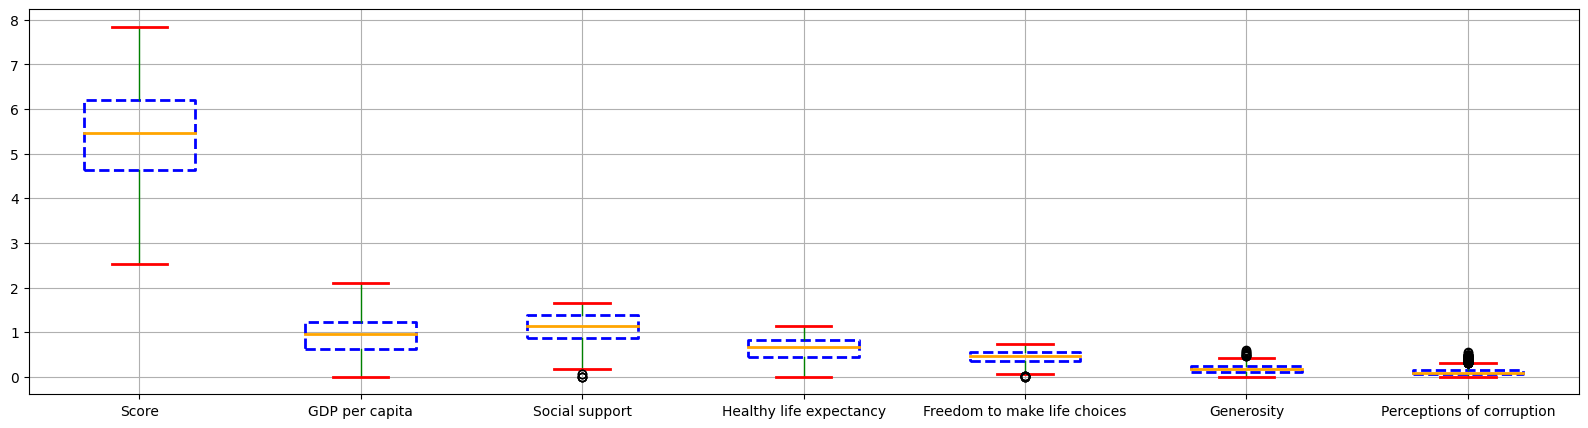

In [ ]:
boxprops = dict(linestyle='--', linewidth=2, color='blue')
whiskerprops = dict(linestyle='-', linewidth=1, color='green')
capprops = dict(linestyle='-', linewidth=2, color='red')
medianprops = dict(linestyle='-', linewidth=2, color='orange')
df_merged.boxplot(column=['Score','GDP per capita','Social support',
                          'Healthy life expectancy','Freedom to make life choices',
                          'Generosity','Perceptions of corruption'], showfliers=True, 
                   figsize=(20,5),boxprops=boxprops, whiskerprops=whiskerprops,
                   capprops=capprops, medianprops=medianprops)

**REMOVAL OF OUTLIERS**

When outliers are removed, the box plot will show a symmetric distribution of the data, with the median and the quartiles clearly identified within the box. The whiskers will be short, since they will only extend to the minimum and maximum values of the dataset. Overall, a box plot without outliers suggests that the data is relatively consistent and does not contain any extreme values.

In [ ]:
summary = df_merged.describe()
# Identify outliers
outliers = {}
has_outlier = True
while has_outlier:
  for column in ['GDP per capita','Social support','Healthy life expectancy',
                'Freedom to make life choices','Generosity',
                'Perceptions of corruption']:
      out = []
      q1 = df_merged[column].quantile(0.25)
      q3 = df_merged[column].quantile(0.75)
      iqr = q3 - q1
      upper_bound = q3 + 1.5 * iqr
      lower_bound = q1 - 1.5 * iqr
      
      out.extend(df_merged[(df_merged[column] < lower_bound) | 
                          (df_merged[column] > upper_bound)][column].tolist())
      df_merged.drop(df_merged[(df_merged[column] < lower_bound) | 
                              (df_merged[column] > upper_bound)].index,
                      inplace=True)
      print(column, ':', out)
      has_outlier = len(out) != 0


In [ ]:

df_merged.boxplot(column=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'], showfliers=True,  figsize=(20,5),boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)



# EXPLORATORY DATA ANALYSIS

EDA uses visual techniques such as graphs, plots, and other visualizations to understand data.

**CHECKING THE DATATYPE OF EACH COLUMN**

**Data types of feature variables**

In [ ]:
print("Data types of independent variables") 
print(X.dtypes)


Data types of independent variables
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


**Data type of response variable**

In [ ]:
print("Data types of dependent variable") 
print(y.dtypes)

Data types of dependent variable
Score    float64
dtype: object


**CHECKING FOR MISSING VALUES**

**Checking missing values in feature variables**

In [ ]:
print(X.isnull().sum())

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


**Checking missing value in Response variable**

In [ ]:
print(y.isnull().sum())

**SUMMARY STATISTICS**

In [ ]:
X.describe()

In [ ]:
y.describe()

**SCATTER MATRIX PLOT**

In scatter plot matrix, most of the features shows a linear relationship which means that as the values of X increase, the values of another variable also tend to increase. 

In [ ]:
print(colored("2018", attrs=["bold"]))
a = sns.pairplot(df_2018)
plt.show()
print(colored("2019", attrs=["bold"]))
b = sns.pairplot(df_2019)
plt.show()
print(colored("2020", attrs=["bold"]))
b = sns.pairplot(df_2020)
plt.show()
print(colored("2021", attrs=["bold"]))
b = sns.pairplot(df_2021)
plt.show()

**CORRELATION CHECK - HEAT MAP**

The correlation matrix shows the strength of the linear relationships between happiness scores across all countries and all other features in the merged dataset. The diagonal of the matrix shows the correlation of each year's happiness scores with itself, which is always equal to 1. The off-diagonal elements of the matrix show the correlations between happiness scores across different years. Overall, the heatmap suggests a strong positive correlation between happiness scores across all years and countries, with a range of correlations between approximately 0.6 and 1.0.  

Text(0.5, 1.0, '2018 to 2021')

<Figure size 640x480 with 0 Axes>

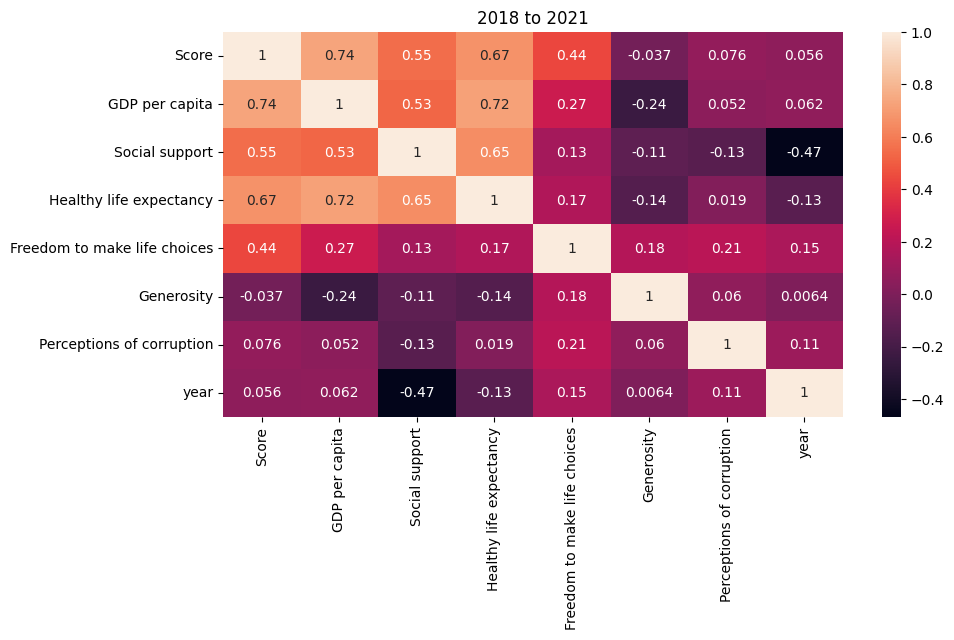

In [ ]:
plt.suptitle("Correlation of  Happiness score 2018 to 20021 ")
fig, ax = plt.subplots(1,1, figsize=(10,5))
#plt.suptitle("Correlation of World Happiness score 2018")
sns.heatmap(df_merged.corr(), annot=True).set_title('2018 to 2021')

**REGRESSION**

**TESTING AND TRAINING DATA**

Part of the data used for learning the regression model is called the **TRAINING DATA SET.**

Remaining data is used for testing the model predictions is called the **TESTING DATA SET.**

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

**PERFORMING LINEAR REGRESSION**

In [45]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

**REGRESSION COEFFICIENTS**

In [ ]:
print(regression.intercept_)
print(regression.coef_)

**FINDING PREDICTED VALUES**

In [46]:
y_pred = regression.predict(X_test)

**HAPPINESS SCORE PREDICTOR**

**Happiness score = 2.3 + 1.1 * GDP per capita + 0.5 * Social support + 0.92 * Healthy life expectancy + 1.73 * Freedom to make life choices + 0.75 * Generosity + 0.14 * Perceptions of corruption**


Freedom To Make Life Choices & GDP are the factors that contributes most to the happiness of individual in a country 

**FINDING PERFOMANCE OF THE MODEL**

Mean squared error (MSE) and Adj.R-squared (R2) are commonly used to evaluate the performance of a regression model.Adj.R2 measures the proportion of variance in the Y that is explained by the independent variables in the model. A higher adj.R2 value indicates that the model is better at explaining the variance in the target variable.

Here Adj R- squared value is .75, which means 75 % of variance in Y is explained by the predictor variables.

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test) # number of samples
p = X_test.shape[1] # number of features in the test set
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
#adj_r2 = regression.rsquared_adj
print("Mean squared error: ", mse)
print("R-squared: ", r2)
print("adj R-Squared:", adj_r2)

Mean squared error:  0.28744940295239263
R-squared:  0.7615178629263148
adj R-Squared: 0.7542911314998395


**SCATTER PLOT - FREEDOM Vs HAPPINESS**

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='blue', lw=4)
plt.title('Observed vs Predicted')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

**CREATING A MODEL WITHOUT THE FEATURES "GENEROSITY", SOCIAL SUPPORT & PERCEPTIONS OF CORRUPTION**

In [49]:
features = ['GDP per capita','Healthy life expectancy','Freedom to make life choices']
X_new = df_merged[features]
y_new = df_merged[['Score']]

**TESTING AND TRAINING DATA**

In [50]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new,y_new,test_size=1/3,random_state=42)

**PERFORMING LINEAR REGRESSION**

In [51]:
from sklearn.linear_model import LinearRegression
regression_new = LinearRegression()
regression_new.fit(X_new_train, y_new_train)
y_new_pred = regression_new.predict(X_new_test)

**REGRESSION COEFFICIENTS**

In [52]:
print(regression_new.intercept_)
print(regression_new.coef_)

[2.52755743]
[[1.37101954 1.12248794 2.14167146]]


**PERFOMANCE OF THE MODEL - Rsquare**

Here Adj.R-Square of the model is .73 which means 73% percentage variation of Y is xplained by  feature variables.

Model with all variables has better adj r sqaure compared to second.

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_new_test, y_new_pred)
r2 = r2_score(y_new_test, y_new_pred)
n = len(y_test) # number of samples
p = X_test.shape[1] # number of features in the test set
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
#adj_r2 = regression.rsquared_adj
print("Mean squared error: ", mse)
print("R-squared: ", r2)
print("adj R-Squared:", adj_r2)

Mean squared error:  0.30530332368044666
R-squared:  0.7467053737486085
adj R-Squared: 0.7390297790137178


In [ ]:
plt.scatter(y_new_test, y_new_pred)
plt.plot([y_new_test.min(), y_new_test.max()], [y_new_pred.min(), y_new_pred.max()], color='blue', lw=4)
plt.title('Freedom vs Happiness Score')
plt.xlabel('Observed Data')
plt.ylabel('Predicted Data')
plt.show()

**Trying KNN Regression for predicting Score**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)

Calcuating the r2 score

In [ ]:
r2_anon = r2_score(y_test, knn_pred)

print('R2 Score with Knn):', r2_anon)

R2 Score with Knn): 0.7439983817964124


**Trying MLP Regression for predicting Score with with 3 hidden layers**

In [ ]:
from sklearn.neural_network import MLPRegressor
lm1 = MLPRegressor(hidden_layer_sizes=(100,100,50), solver='lbfgs', max_iter=100000, random_state=1)
lm1.fit(X_train, y_train)

In [ ]:
lm1_pred = lm1.predict(X_test)

Calculating mse and r-squared values

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, lm1_pred)
r2 = r2_score(y_test, lm1_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  1.0664225920477712
R-squared:  0.11524346141246944


# Conclusion

Based on the results of our experiments with different regression models, including Linear Regression, KNN, and MLP Regression, we have found that Linear Regression performed the best.

Linear Regression showed the highest accuracy and lowest errors among the tested models. It provided the most reliable predictions, with the smallest difference between predicted and actual values. Although KNN and MLP Regression showed some promise, they did not perform as well as Linear Regression in our experiments.

Therefore, we recommend using Linear Regression model for the prediction